## Regression problem using Medical cost dataset

dataset can be found here: https://www.kaggle.com/mirichoi0218/insurance

## Step 1: Load packages, dataset and check the data we working with.

* Is there anything wrong with the data?
* Are there any anormalities with the data?
* Do I need to fix or remove any of the data including null values?


In [1]:
#importing necesaary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('/Users/mzwakhebesho/Documents/DPY401T Assignment/Regression Problem/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The data is usable.

We can gather the following:
* The first row in the data file defines the column headers
* The headers are understandable enough to what each column represents.
* Each row represents an entry for an individual: 6 input data points and one target, which tells us the cost amount of the insurance.

In [ ]:
# Now let's check complete information of each column
df.info()

In [ ]:
# check the structure of the data
df.shape

# (1338, 7) : 1338 rows and 7 columns

Info cell shows data types of each column. We have categorical data in column: Sex, Smoker and Region.

Another question we need to ask ourselves is Region influencing insurance costs.

For now we going to check for null values

In [ ]:
df.isnull().values.any()

Yay! We have no null values

<AxesSubplot:>

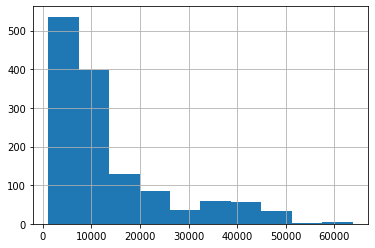

In [3]:
df['charges'].hist()

In [4]:
print(df['sex'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64


In [5]:
# Categorical data, we can use OneHot Encoding. Prefer not to complicate it.
# Sex: Female - 0, Male - 1
# Smoker: Yes - 1, No - 0

try:
    gender = {'male': 1,'female': 0}
    is_smoker = {'yes': 1,'no': 0}
    df.sex = [gender[item] for item in df.sex]
    df.smoker = [is_smoker[item] for item in df.smoker]
except Exception as exc:
    print(f"[EXCEPTION] The dataframe has been transversed. Only run this cell once. - {exc}")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


Now we have numeric values for sex and smoker columns. Since Region column has about 4 different regions, let's use enconding

### OneHot Encoding

In [7]:
# droping region as is a least feature I can use
df = df.drop(['region'], axis=1)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [ ]:
#OneHot encoding 
#df = pd.get_dummies(df,columns=['region'])
#df.head()

<AxesSubplot:>

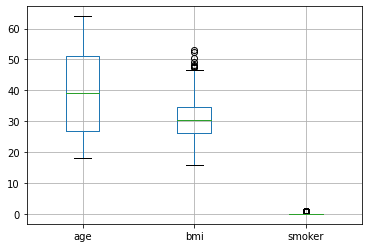

In [8]:
df.boxplot(column=['age','bmi','smoker'])

<AxesSubplot:>

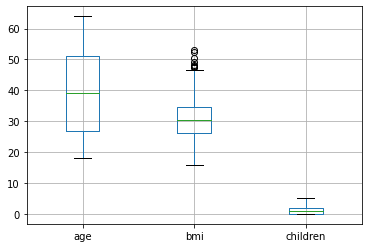

In [9]:
df.boxplot(column=['age','bmi','children'])

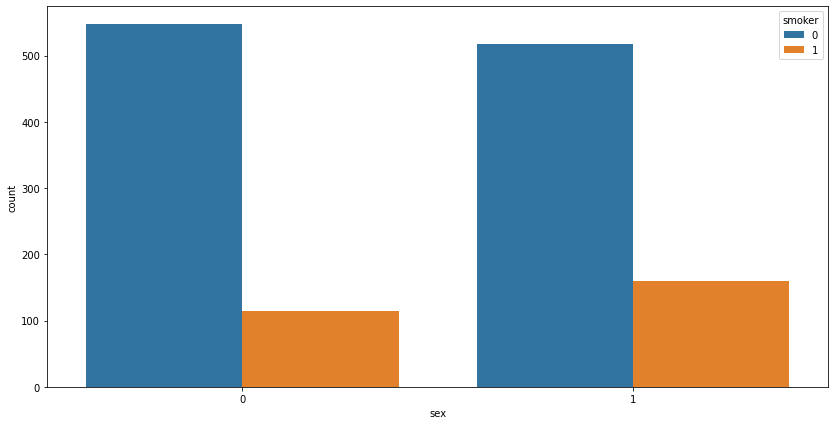

In [10]:
plt.figure(figsize=(14,7))
sb.countplot(x='sex', hue='smoker', data=df)
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

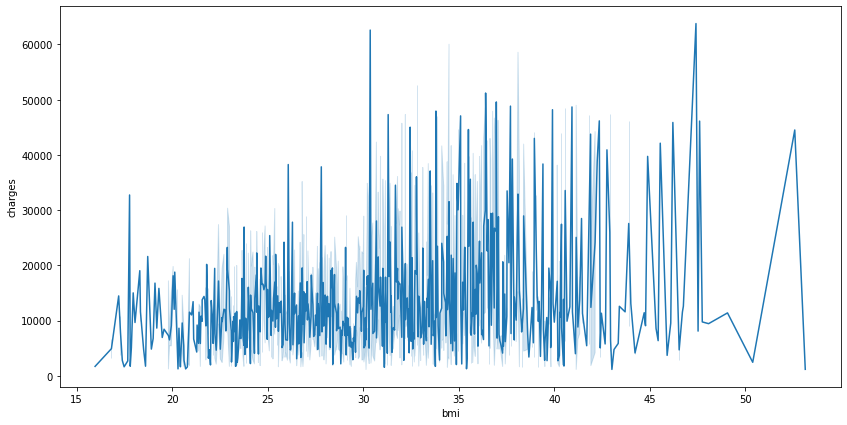

In [11]:
plt.figure(figsize=(14,7))
sb.lineplot(x='bmi', y='charges', data=df, palette='Set3')

<AxesSubplot:xlabel='children', ylabel='charges'>

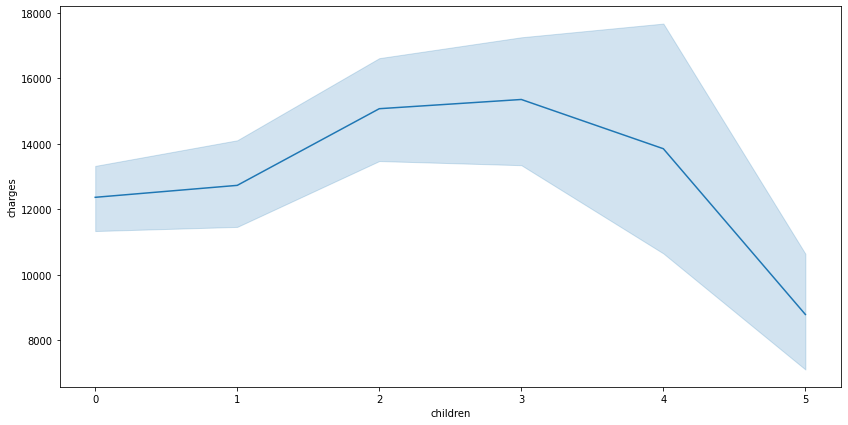

In [12]:
plt.figure(figsize=(14,7))
sb.lineplot(x='children', y='charges', data=df, palette='Set3')

<AxesSubplot:xlabel='age', ylabel='charges'>

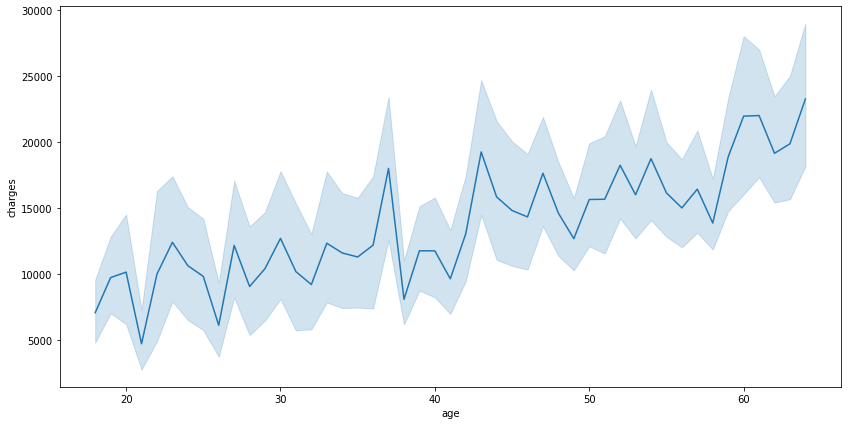

In [13]:
plt.figure(figsize=(14,7))
sb.lineplot(x='age', y='charges', data=df, palette='Set1')

## Step 2: Scalling our data

From the boxplot above, we need to scale down our values

We could use the following:
* Standard Scaler
* MinMax Scaler
* Robust Scaler

We using MinMax Scaler because the largest data point or feature will have a value close to 1 or 1 and the minimum value will be 0.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#data_scaler = MinMaxScaler()

#scaled_data = data_scaler.fit_transform(df.to_numpy())

In [ ]:
#scaled_data = pd.DataFrame(scaled_data,columns=['age','sex','bmi','children','smoker','charges','region_northeast','region_northwest','region_southeast', 'region_southwest'])

In [ ]:
#scaled_data.dtypes

In [ ]:
#scaled_data.boxplot(column=['age','bmi','smoker'])

In [ ]:
#scaled_data.boxplot(column=['age','bmi','children'])

## Step 3: Splitting Dataset into training and test

In [14]:
# First we need to take out features and targets in our dataset
feature_columns = ['age', 'sex', 'bmi', 'children', 'smoker']
X_features = df.drop(['charges'], axis=1) #axis = 1 means we taking the whole column and drop it. axis = 0 means whole row
Y_targets = df[['charges']]

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_features,Y_targets,test_size=0.33, random_state=42)

In [16]:
X_train.head()

,age,sex,bmi,children,smoker
1046,43,0,25.080,0,0
682,39,1,35.300,2,1
1037,45,0,30.495,1,1
490,19,0,32.900,0,0
39,60,1,39.900,0,1


## Applying Linear Regression as the first model

In [17]:
from sklearn.linear_model import LinearRegression

linear_r = LinearRegression()
linear_r.fit(X_train,y_train)

LinearRegression()

Prediction time

In [18]:
y_train_pred = linear_r.predict(X_train)

In [19]:
# Model predictions using test data
y_test_pred = linear_r.predict(X_test)

In [20]:
test_results = X_test.copy()
test_results['true_charge'] = y_test
test_results['predicted_charge'] = y_test_pred

test_results.head(3)

,age,sex,bmi,children,smoker,true_charge,predicted_charge
764,45,0,25.175,2,0,9095.06825,8405.925660
887,36,0,30.020,0,0,5272.17580,6896.238685
890,64,0,26.885,0,1,29330.98315,36895.589824


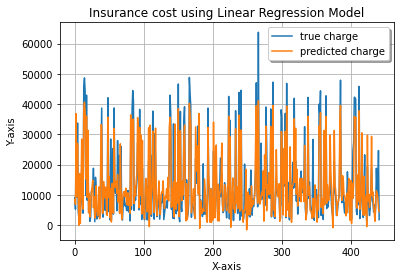

In [21]:
x_axis = range(len(y_test_pred))
plt.plot(x_axis, y_test, label="true charge")
plt.plot(x_axis, y_test_pred, label="predicted charge")
plt.title("Insurance cost using Linear Regression Model")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [22]:
model_score_train = linear_r.score(X_train,y_train)
model_score_test = linear_r.score(X_test,y_test)

print(f"Train score:{model_score_train} Test score:{model_score_test}")

Train score:0.7447818782365105 Test score:0.7587422388407032


In [23]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_test_pred)
r2

0.7587422388407032

## Tuning Linear Regression parameters using GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_jobs': [1,2,3,4,5]}

grid_search = GridSearchCV(linear_r, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'n_jobs': [1, 2, 3, 4, 5]})

In [28]:
linear_grid_search_pred = grid_search.predict(X_test)

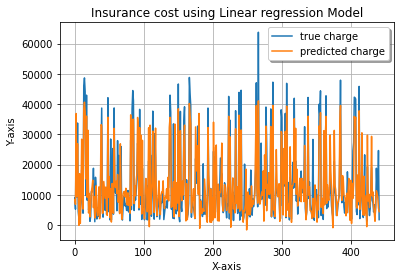

In [29]:
x_axis = range(len(linear_grid_search_pred))
plt.plot(x_axis, y_test, label="true charge")
plt.plot(x_axis, linear_grid_search_pred, label="predicted charge")
plt.title("Insurance cost using Linear regression Model")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
linear_model_score_test = linear_grid_search_pred.score(X_test,y_test)

print(f"Test score:{linear_model_score_test}")

## Applying Random Forest Regressor as the second model

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

random_forest_model = RandomForestRegressor(max_depth=100, n_estimators=100)

random_forest_model.fit(X_train, y_train)

/var/folders/25/mzv133cj43d_68dk_1mnk9480000gn/T/ipykernel_10673/2716070812.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=100)

In [62]:
RF_y_train_pred = random_forest_model.predict(X_train)

In [63]:
RF_y_test_pred = random_forest_model.predict(X_test)

In [64]:
RF_test_results = X_test.copy()
RF_test_results['true_charge'] = y_test
RF_test_results['predicted_charge'] = RF_y_test_pred

RF_test_results.head(3)

,age,sex,bmi,children,smoker,true_charge,predicted_charge
764,45,0,25.175,2,0,9095.06825,8550.530186
887,36,0,30.020,0,0,5272.17580,5409.550253
890,64,0,26.885,0,1,29330.98315,28207.444167


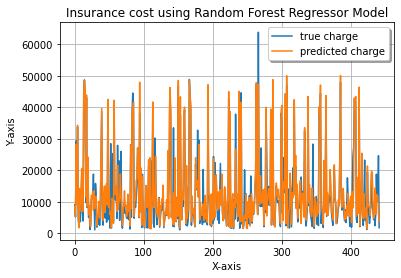

In [65]:
x_axis = range(len(y_test_pred))
plt.plot(x_axis, y_test, label="true charge")
plt.plot(x_axis, RF_y_test_pred, label="predicted charge")
plt.title("Insurance cost using Random Forest Regressor Model")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [66]:
rf_model_score_train = random_forest_model.score(X_train,y_train)
rf_model_score_test = random_forest_model.score(X_test,y_test)

print(f"Train score:{rf_model_score_train} Test score:{rf_model_score_test}")

Train score:0.9738868639515434 Test score:0.8370706301620687


## Tuning Random Forest Regressor parameters using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [80, 90, 100],
    'max_features': [3, 4, 5],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30]
}

rfr_grid_search = GridSearchCV(estimator = random_forest_model, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 2)
rfr_grid_search.fit(X_train, y_train)

In [37]:
print(f'Best parameters: {rfr_grid_search.best_params_}')
print(f'Model: {rfr_grid_search.best_estimator_}')

Best parameters: {'max_depth': 90, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 10}
Model: RandomForestRegressor(max_depth=90, max_features=4, min_samples_leaf=4,
                      min_samples_split=12, n_estimators=10)


In [38]:
rfr_grid_search_pred = rfr_grid_search.predict(X_test)

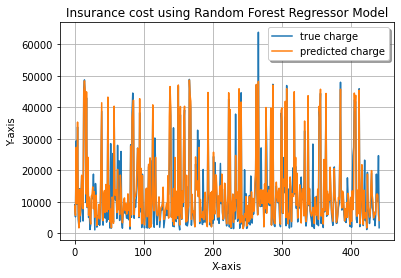

In [41]:
x_axis = range(len(rfr_grid_search_pred))
plt.plot(x_axis, y_test, label="true charge")
plt.plot(x_axis, rfr_grid_search_pred, label="predicted charge")
plt.title("Insurance cost using Random Forest Regressor Model")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [43]:
rf_model_score_test = rfr_grid_search.score(X_test,y_test)
print(f"Test score:{rf_model_score_test}")

Test score:0.8629835247721431


## Applying Decision Tree Regressor as the third model

In [38]:
from sklearn.tree import DecisionTreeRegressor

DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
DT_y_train_pred = DT_regressor.predict(X_train)

In [40]:
DT_y_test_pred = DT_regressor.predict(X_test)

In [41]:
DT_test_results = X_test.copy()
DT_test_results['true_charge'] = y_test
DT_test_results['predicted_charge'] = DT_y_test_pred

DT_test_results.head(3)

,age,sex,bmi,children,smoker,true_charge,predicted_charge
764,45,0,25.175,2,0,9095.06825,8515.75870
887,36,0,30.020,0,0,5272.17580,5373.36425
890,64,0,26.885,0,1,29330.98315,28950.46920


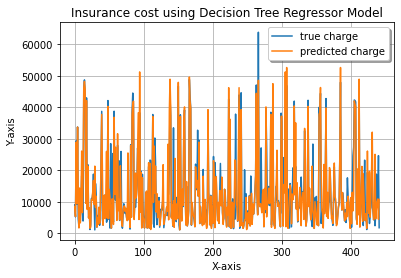

In [42]:
x_axis = range(len(y_test_pred))
plt.plot(x_axis, y_test, label="true charge")
plt.plot(x_axis, DT_y_test_pred, label="predicted charge")
plt.title("Insurance cost using Decision Tree Regressor Model")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [43]:
dt_model_score_train = DT_regressor.score(X_train,y_train)
dt_model_score_test = DT_regressor.score(X_test,y_test)

print(f"Train score:{dt_model_score_train} Test score:{dt_model_score_test}")

Train score:1.0 Test score:0.7359612995449795


Overfitting on Decision Tree Regressor. Good performance on the training data, poor generliazation to other data.

## Tuning Decision Tree Regressor parameters using GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,15],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
            "max_features":["auto","sqrt"],
            "max_leaf_nodes":[10,20,30] }


search_grid = GridSearchCV(DT_regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=3)

In [52]:
#Best parameters to tune with
search_grid = DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=30,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='random')

In [53]:
search_grid.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=30,
                      min_samples_leaf=2, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [54]:
grid_y_test_pred = search_grid.predict(X_test)

In [55]:
DT_grid_test_results = X_test.copy()
DT_grid_test_results['true_charge'] = y_test
DT_grid_test_results['predicted_charge'] = grid_y_test_pred

DT_grid_test_results.head(3)

,age,sex,bmi,children,smoker,true_charge,predicted_charge
764,45,0,25.175,2,0,9095.06825,11761.194183
887,36,0,30.020,0,0,5272.17580,5847.039443
890,64,0,26.885,0,1,29330.98315,31716.739861


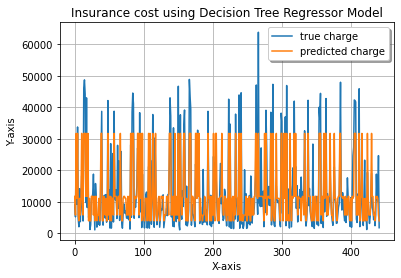

In [57]:
x_axis = range(len(grid_y_test_pred))
plt.plot(x_axis, y_test, label="true charge")
plt.plot(x_axis, grid_y_test_pred, label="predicted charge")
plt.title("Insurance cost using Decision Tree Regressor Model")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [58]:
dt_grid__model_score_test = search_grid.score(X_test,y_test)

print(f"Test score:{dt_grid__model_score_test}")

Test score:0.6949659198956919


## Showing predicated values for different models on 1 table

In [67]:
final_results = X_test.copy()
final_results['true_charge'] = y_test
final_results['linear_regr_predicted_charge'] = y_test_pred
final_results['randomf_regr_predicted_charge'] = RF_y_test_pred
final_results['decisiont_regr_predicted_charge'] = DT_y_test_pred

final_results.head(3)

,age,sex,bmi,children,smoker,true_charge,linear_regr_predicted_charge,randomf_regr_predicted_charge,decisiont_regr_predicted_charge
764,45,0,25.175,2,0,9095.06825,8405.925660,8550.530186,8515.75870
887,36,0,30.020,0,0,5272.17580,6896.238685,5409.550253,5373.36425
890,64,0,26.885,0,1,29330.98315,36895.589824,28207.444167,28950.46920


## Determining the best model

In [68]:
models = [('Linear Regression', '{0:.3f}'.format(model_score_train), '{0:.3f}'.format(model_score_test)),
          ('Random Forest Regressor', '{0:.3f}'.format(rf_model_score_train), '{0:.3f}'.format(rf_model_score_test)),
          ('Decision Tree Regressor', '{0:.3f}'.format(dt_model_score_train), '{0:.3f}'.format(dt_model_score_test))]

model_results = pd.DataFrame(data = models, columns=['Model', 'Training R2_Score', 'Test R2_Score'])
model_results

,Model,Training R2_Score,Test R2_Score
0,Linear Regression,0.745,0.759
1,Random Forest Regressor,0.974,0.837
2,Decision Tree Regressor,1.000,0.736


In [70]:
from sklearn import metrics

print('Liner Regression MAE:', metrics.mean_absolute_error(y_test,y_test_pred))
print('Liner Regression MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('Liner Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Liner Regression MAE: 4214.102168421426
Liner Regression MSE: 35355035.59512183
Liner Regression RMSE: 5946.010056762588


In [71]:
print('Random Forest Regressor MAE:', metrics.mean_absolute_error(y_test,RF_y_test_pred))
print('Random Forest Regressor MSE:', metrics.mean_squared_error(y_test, RF_y_test_pred))
print('Random Forest Regressor RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_y_test_pred)))

Random Forest Regressor MAE: 2658.68262197353
Random Forest Regressor MSE: 23876428.44081352
Random Forest Regressor RMSE: 4886.351240016779


In [72]:
print('Decision Tree Regressor MAE:', metrics.mean_absolute_error(y_test,DT_y_test_pred))
print('Decision Tree Regressor MSE:', metrics.mean_squared_error(y_test, DT_y_test_pred))
print('Decision Tree Regressor RMSE:', np.sqrt(metrics.mean_squared_error(y_test, DT_y_test_pred)))

Decision Tree Regressor MAE: 2869.7494230067878
Decision Tree Regressor MSE: 38693460.50555952
Decision Tree Regressor RMSE: 6220.40677974998
